In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
import astropy
from astropy.io import fits
import json

In [2]:
import wavecal_comb_v2 # this is actually wavecal_comb in the shared git repo

In [15]:
reload(wavecal_comb_v2)

<module 'wavecal_comb_v2' from 'wavecal_comb_v2.py'>

In [3]:
testcal = fits.getdata('./thar_comb_combined_wcal_thar03to36_comb37to100_90index_modified_o88_89.fits')

In [6]:
testin = fits.open('./data/neidL1_20190920T074114.fits')
testdat_sci = testin[1].data
testdat_cal = testin[3].data
hh = testin[0].header

In [7]:
f0 = float(hh['LFCREFF0'])
fr = float(hh['LFCREFFR'])

In [9]:
mode_ids_1 = load('modes_named.npy',allow_pickle=True)[()]

In [16]:
fullcal = wavecal_comb_v2.derive_modified_wavecal_comb(testdat_sci,testcal,f0,fr,mode_ids_1)

wavecal_comb_v2.py:362: RuntimeWarning: divide by zero encountered in divide
  bounds=(legbound_lower,legbound_upper))


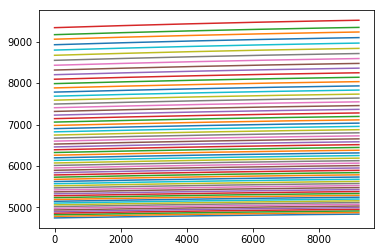

In [18]:
for i in range(26,90):
    plot(fullcal[0][i,:])

In [19]:
fit_locs = wavecal_comb_v2.find_mode_centroids(testdat_sci,testcal,mode_ids_1)

In [25]:
fit_locs[50].keys()

[u'344',
 u'0',
 u'346',
 u'347',
 u'340',
 u'341',
 u'342',
 u'343',
 u'348',
 u'349',
 u'298',
 u'299',
 u'296',
 u'297',
 u'294',
 u'295',
 u'292',
 u'293',
 u'290',
 u'291',
 u'199',
 u'198',
 u'195',
 u'194',
 u'197',
 u'196',
 u'191',
 u'190',
 u'193',
 u'192',
 u'270',
 u'271',
 u'272',
 u'273',
 u'274',
 u'275',
 u'276',
 u'277',
 u'278',
 u'279',
 u'449',
 u'448',
 u'443',
 u'442',
 u'441',
 u'440',
 u'447',
 u'446',
 u'445',
 u'444',
 u'108',
 u'109',
 u'102',
 u'103',
 u'100',
 u'101',
 u'106',
 u'107',
 u'104',
 u'105',
 u'39',
 u'38',
 u'33',
 u'32',
 u'31',
 u'30',
 u'37',
 u'36',
 u'35',
 u'34',
 u'438',
 u'439',
 u'436',
 u'437',
 u'434',
 u'435',
 u'432',
 u'433',
 u'430',
 u'431',
 u'339',
 u'338',
 u'335',
 u'334',
 u'337',
 u'336',
 u'331',
 u'330',
 u'333',
 u'332',
 u'345',
 u'6',
 u'99',
 u'98',
 u'91',
 u'90',
 u'93',
 u'92',
 u'95',
 u'94',
 u'97',
 u'96',
 u'238',
 u'239',
 u'234',
 u'235',
 u'236',
 u'237',
 u'230',
 u'231',
 u'232',
 u'233',
 u'1',
 u'146',


In [26]:
# constrained example
legfix = [False,False,True,True,True,True,True]
legbound=[[0,6000],[0,100],-5.6624,4.433e-2,-1.0649e-2,-2.81233e-4,1.73905e-4]
out_order_50 = wavecal_comb_v2.derive_modified_wavecal_comb_order(fit_locs[50],testcal[50,:],fit_order=6,comb_fr=fr,
                                                                 comb_f0=f0,buf=10,legfix=legfix,legbound=legbound)

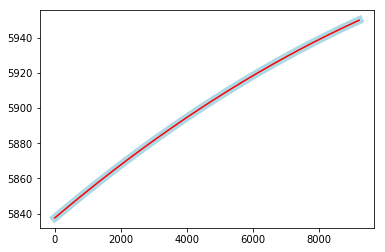

In [32]:
plot(fullcal[0][50,:],lw=8,color='lightblue')
plot(out_order_50[0],'r-')